# Bike Shared Assignment

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.

## **Step 1: Reading and Understanding The Data**

In [1753]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1754]:
# Loading data from data file to dataframe
data = pd.read_csv('day.csv')

# Checking the head of the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the dataframe

In [1755]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**There is not any null data found**

In [1756]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Move the 'cnt' to the first column for better view

In [1757]:
cnt_col = data.pop("cnt")  # Remove and store 'cnt'
data.insert(0, "cnt", cnt_col)

## **Step 2: Exploratory Data Analysis (EDA)**

### Visualising Numeric Variables

In [1758]:
data.head()

,cnt,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,985,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654
1,801,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670
2,1349,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229
3,1562,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454
4,1600,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518


In [1759]:
# Collect numeric variables
numeric_variable = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
numeric_df = data[numeric_variable]

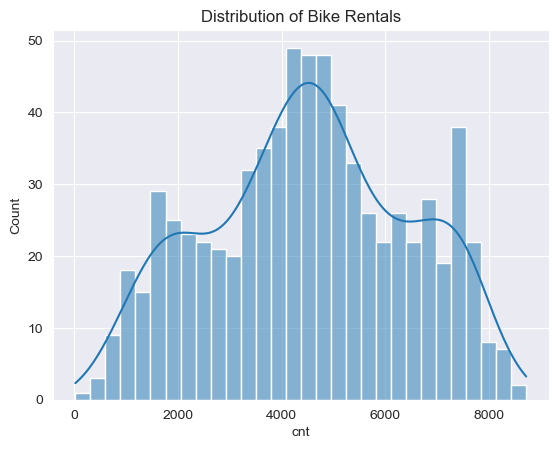

In [1760]:
sns.histplot(data['cnt'], bins=30, kde=True)
plt.title("Distribution of Bike Rentals")
plt.show()

> **The data is approximately normal.**

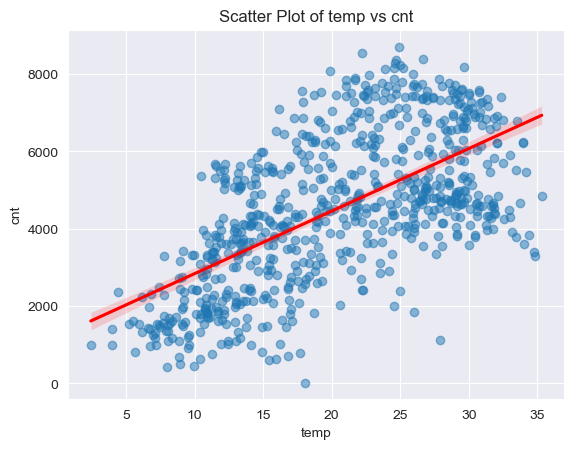

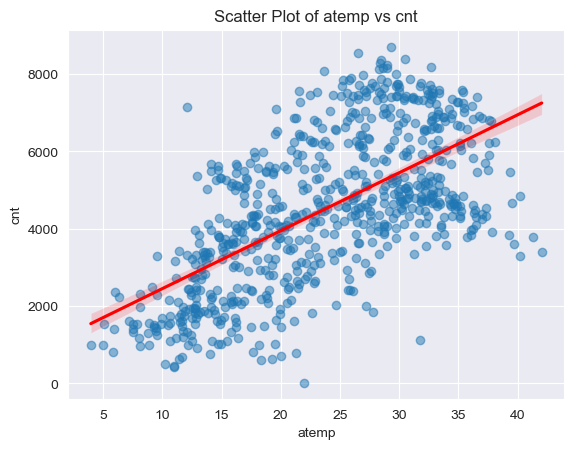

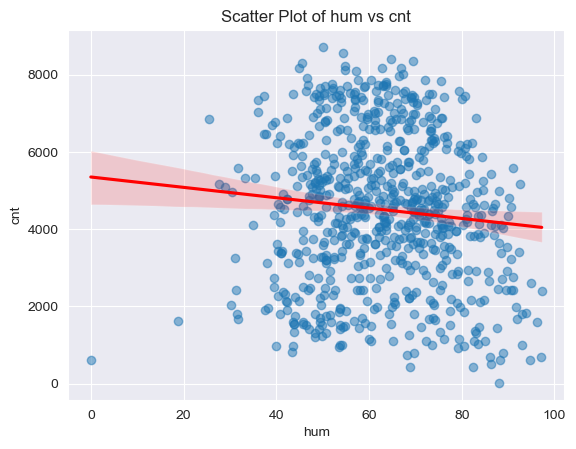

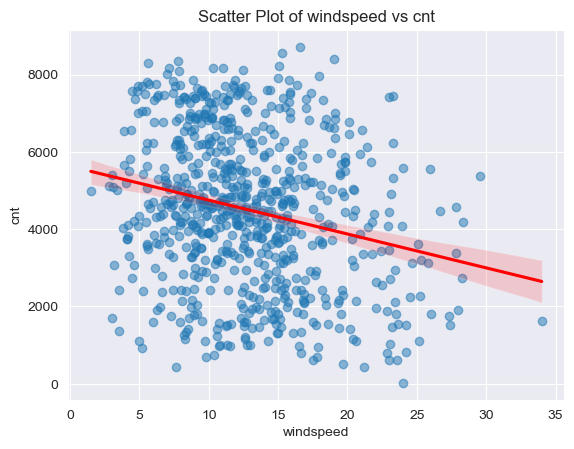

In [1761]:

for var in numeric_variable:
    if var is not 'cnt':
        sns.regplot(x=data[var], y=data["cnt"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
        plt.title(f"Scatter Plot of {var} vs cnt")
        plt.xlabel(var)
        plt.ylabel("cnt")
        plt.show()

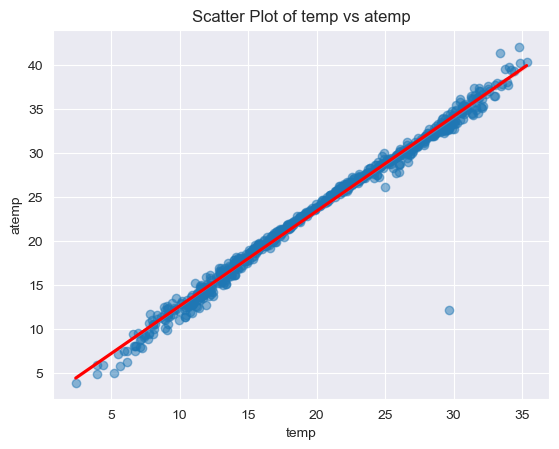

In [1762]:
sns.regplot(x=data['temp'], y=data["atemp"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f"Scatter Plot of temp vs atemp")
plt.xlabel('temp')
plt.ylabel("atemp")
plt.show()

> The scatter plot of `temp` vs `atemp` suggests a nearly perfect linear relationship. This indicates that `atemp` (feels-like temperature) is highly correlated with `temp`. One of them can be dropped to avoid multicollinearity so they are should be considered in next steps

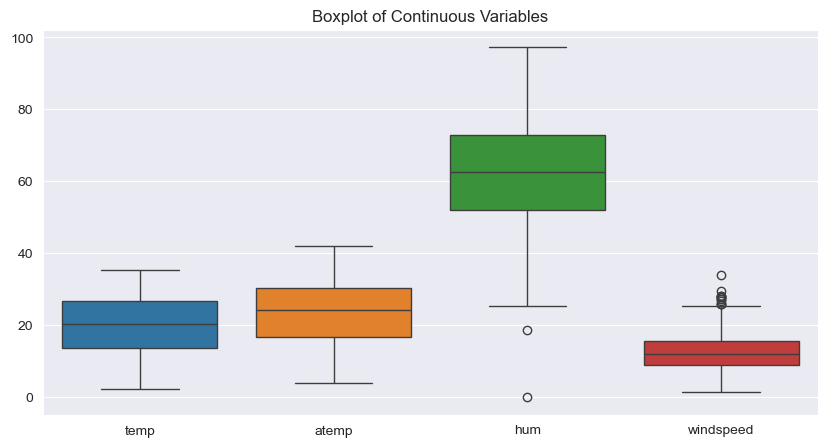

In [1763]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data[['temp', 'atemp', 'hum', 'windspeed']])
plt.title("Boxplot of Continuous Variables")
plt.show()

#### Let's make a pairplot of all the numeric variables

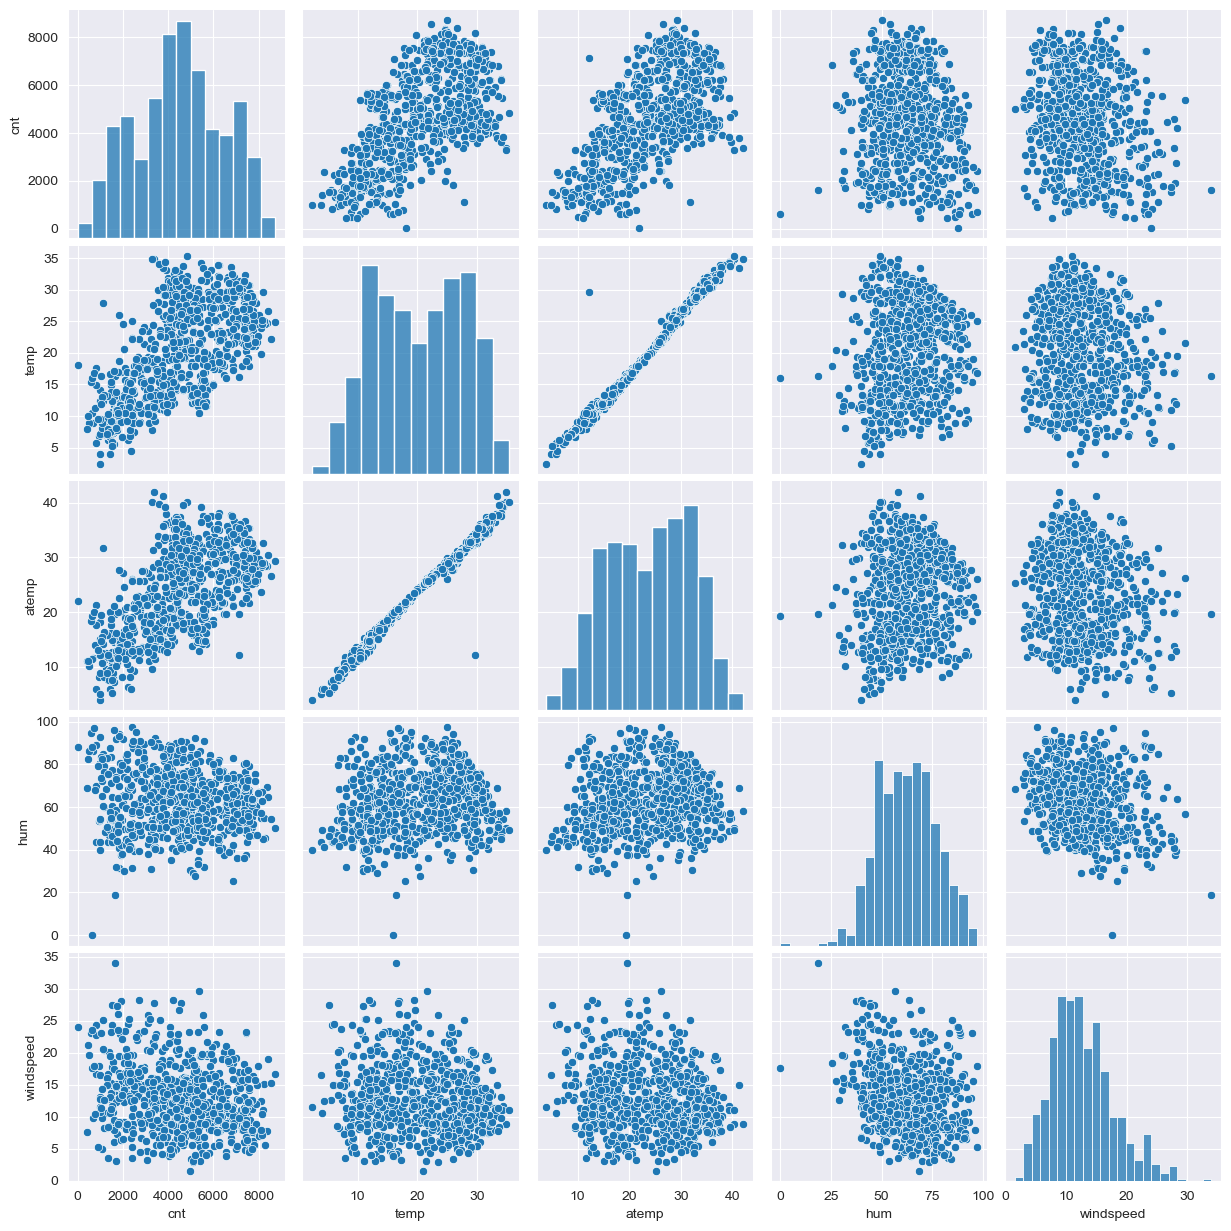

In [1764]:
sns.pairplot(numeric_df)
plt.show()

### Visualising Category Variables

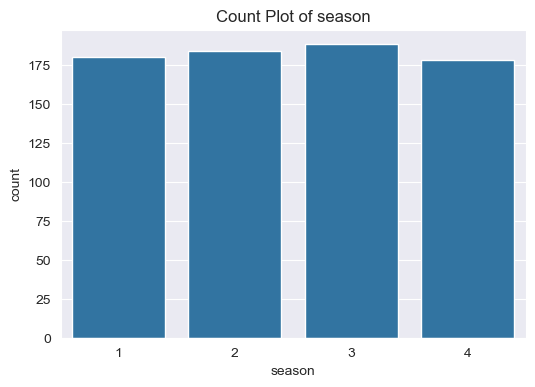

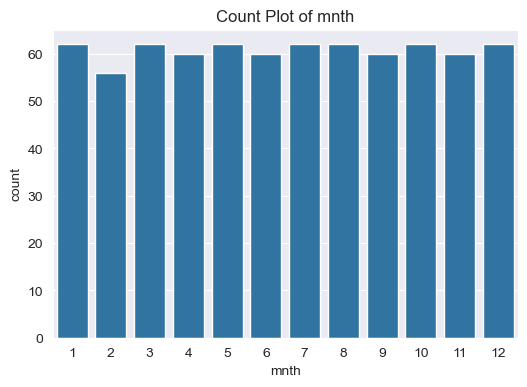

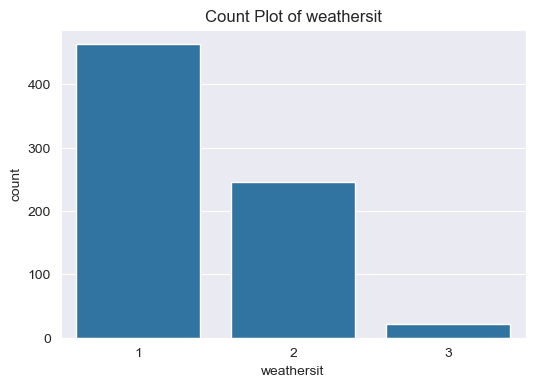

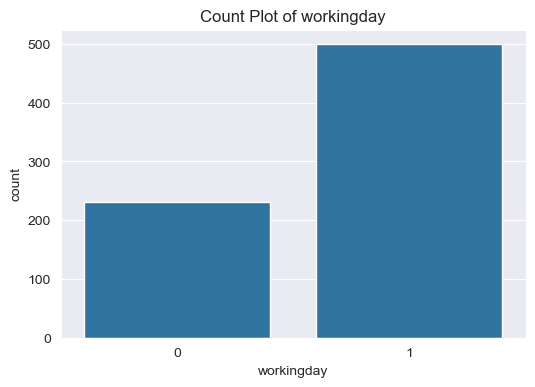

In [1765]:
# Count plots for categorical variables
categorical_vars = ["season", "mnth", "weathersit", "workingday"]
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=var, data=data)
    plt.title(f"Count Plot of {var}")
    plt.show()

## **Step 3: Preprocessing the Data**

### **Drop unnecessary columns**

1. The `instant` column is merely an index for each record in the dataset and contains no meaningful information related to bike demand. Removing this column will not affect the model or data analysis

2. we have already extracted relevant features such as `yr`, `mnth`, and `weekday`, keeping `dteday` would be redundant so dropping it

3.  Column `atemp` (feels-like temperature) is highly correlated with `temp`. Let's drop `atemp` to avoid multicollinearity

4. Column `cnt` is count of total rental bikes including both `casual` and `registered` then we can drop `casual` and `registered` as they are not needed


In [1766]:
data.drop(columns= ['instant', 'dteday','atemp', 'casual', 'registered'], inplace=True)

### **Convert categorical columns to meaningful labels**

In [1767]:
data["season"] = data["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
data["weathersit"] = data["weathersit"].map({1: "Clear", 2: "Mist", 3: "Light Snow/Rain", 4: "Heavy Rain/Snow"})
data["yr"] = data["yr"].map({0: "2018", 1: "2019"})
data.head()

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,985,Spring,2018,1,0,6,0,Mist,14.110847,80.5833,10.749882
1,801,Spring,2018,1,0,0,0,Mist,14.902598,69.6087,16.652113
2,1349,Spring,2018,1,0,1,1,Clear,8.050924,43.7273,16.636703
3,1562,Spring,2018,1,0,2,1,Clear,8.200000,59.0435,10.739832
4,1600,Spring,2018,1,0,3,1,Clear,9.305237,43.6957,12.522300


> There is no 'Heavy Rain/Snow' data record found.

### **Convert categorical variables into dummy variables**

In [1768]:
data = pd.get_dummies(data, columns=["season", "yr", "mnth", "weekday", "weathersit"], drop_first=True).astype(int)
data.head()

,cnt,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow/Rain,weathersit_Mist
0,985,0,0,14,80,10,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,801,0,0,14,69,16,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1349,0,1,8,43,16,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1562,0,1,8,59,10,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1600,0,1,9,43,12,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## **Step 4: Splitting the Data into Training and Testing Sets**

### **Splitting the Data**

In [1769]:
# Import library
from sklearn.model_selection import train_test_split

# Setting a random seed ensures reproducibility, so train-test splits remain consistent across runs
np.random.seed(0)

# Splitting the dataset into 80% training and 20% testing to ensure a balanced model evaluation
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

### **Rescaling the Feature**

**MinMaxScaler scales features to a fixed range (0 to 1), preserving relationships while normalizing values**

In [1770]:
# Import library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_variables = ['cnt','temp', 'hum', 'windspeed']

# Scale the selected numerical features in the training set using MinMaxScaler
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])
df_train.head()

,cnt,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow/Rain,weathersit_Mist
367,0.254717,0,1,0.121212,0.453608,0.68750,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
648,0.868385,0,1,0.454545,0.474227,0.31250,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
44,0.217556,0,1,0.454545,0.381443,0.78125,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
705,0.573631,0,1,0.333333,0.783505,0.18750,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
379,0.263346,0,0,0.121212,0.422680,0.43750,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1771]:
# Generate summary statistics for the scaled training dataset
df_train.describe()

,cnt,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow/Rain,weathersit_Mist
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.515792,0.027397,0.667808,0.533364,0.644824,0.321543,0.251712,0.246575,0.250000,0.513699,...,0.080479,0.087329,0.148973,0.133562,0.154110,0.135274,0.123288,0.150685,0.027397,0.342466
std,0.225336,0.163378,0.471403,0.224576,0.144213,0.163741,0.434369,0.431387,0.433384,0.500241,...,0.272267,0.282558,0.356367,0.340472,0.361363,0.342309,0.329049,0.358048,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350696,0.000000,0.000000,0.333333,0.536082,0.218750,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.522837,0.000000,1.000000,0.545455,0.649485,0.312500,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.691872,0.000000,1.000000,0.727273,0.752577,0.406250,1.000000,0.000000,0.250000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Let's check the correlation coefficients to see which variables are highly correlated

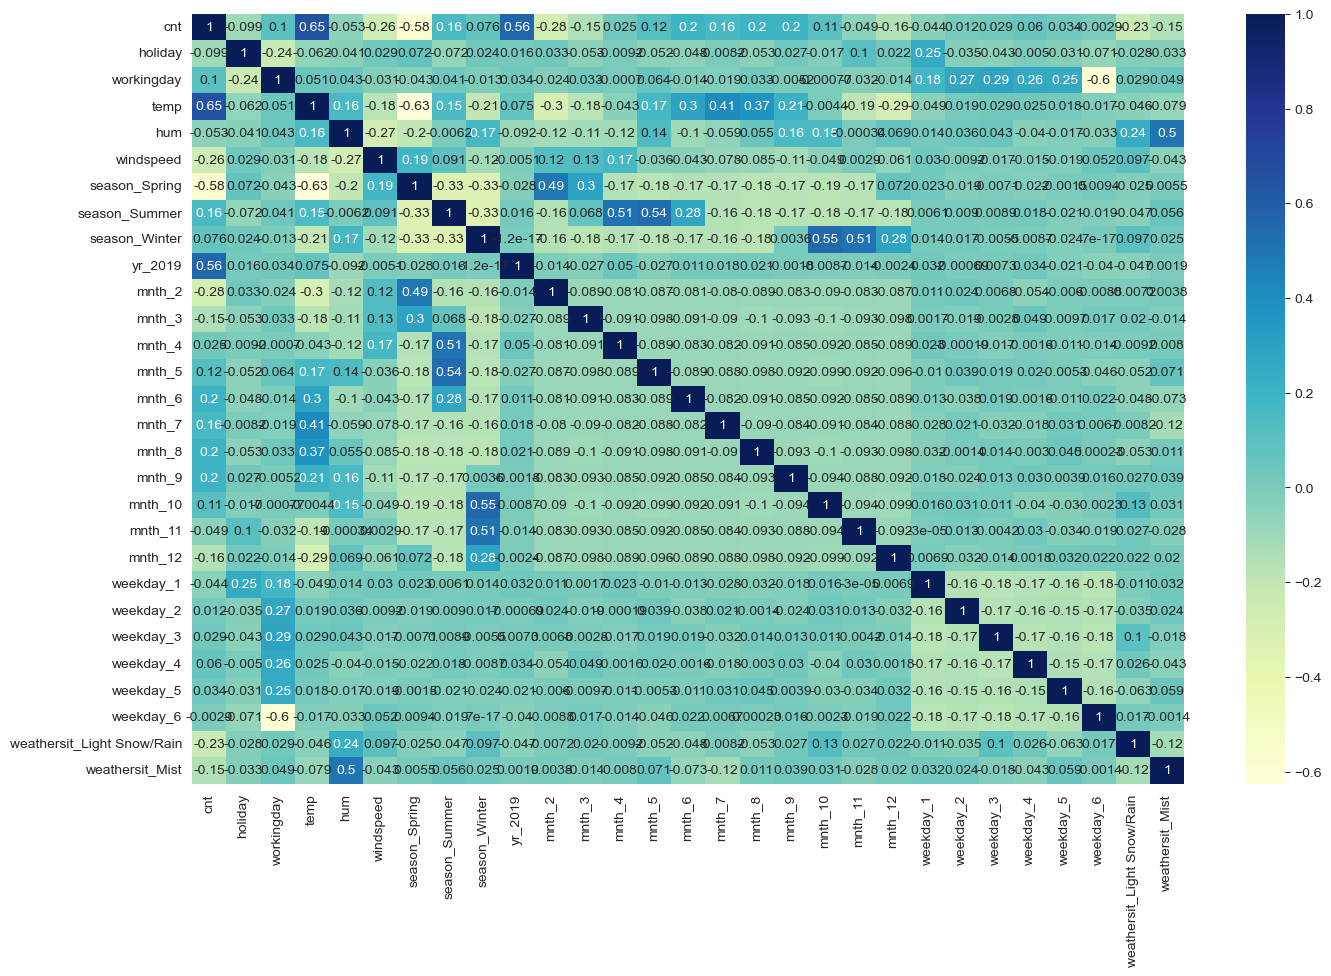

In [1772]:
plt.figure(figsize = (16, 10))
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot = True, cmap="YlGnBu")
plt.show()

> As you might have noticed, `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

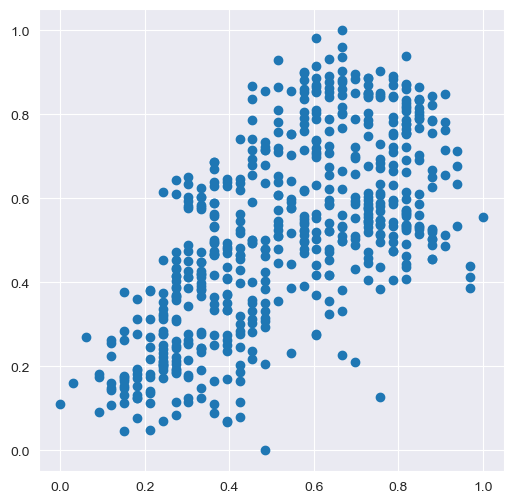

In [1773]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

## **Step 5. Building Model**

### **Manual Selection by using p-value and VIF**

**Dividing into X and Y sets for the model building**

In [1774]:
#Import library
import statsmodels.api as sm

In [1775]:
y_train = df_train.pop('cnt')
X_train = df_train

**Create common functions**

**Function to get variables with high p-value**

In [1776]:
def get_high_pvalue_variables(model, threshold=0.05):
    high_pvalues = model.pvalues[model.pvalues > threshold].sort_values(ascending=False)
    print("================================")
    print("High P-Value List with threshold:", threshold)
    return high_pvalues

**Function to build and summarize OLS model**

In [1777]:
def build_ols_model(X_train, y_train):
    X_train_lm = sm.add_constant(X_train)
    lr = sm.OLS(y_train, X_train_lm).fit()
    print(lr.summary())
    return lr

### **Using all the variables**

In [1778]:
# Build a linear model
model = build_ols_model(X_train, y_train)
get_high_pvalue_variables(model)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     124.1
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.55e-215
Time:                        23:02:32   Log-Likelihood:                 611.49
No. Observations:                 584   AIC:                            -1167.
Df Residuals:                     556   BIC:                            -1045.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

mnth_11          0.691462
mnth_12          0.672914
weekday_4        0.573532
weekday_3        0.473140
mnth_7           0.458360
weekday_2        0.416465
weekday_1        0.249667
weekday_5        0.168734
season_Summer    0.094539
mnth_2           0.090662
dtype: float64

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [1779]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def compute_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif
print(compute_vif(df_train))

                      Features    VIF
0                      holiday    inf
1                   workingday    inf
24                   weekday_5    inf
23                   weekday_4    inf
22                   weekday_3    inf
21                   weekday_2    inf
20                   weekday_1    inf
2                         temp  45.16
3                          hum  32.74
7                season_Winter   9.48
6                season_Summer   9.08
15                      mnth_8   7.75
5                season_Spring   7.25
14                      mnth_7   7.22
12                      mnth_5   7.15
13                      mnth_6   6.51
17                     mnth_10   6.09
16                      mnth_9   5.52
4                    windspeed   5.44
11                      mnth_4   5.15
18                     mnth_11   4.67
19                     mnth_12   3.16
10                      mnth_3   2.78
27             weathersit_Mist   2.34
8                      yr_2019   2.14
25          

In [1780]:
# A common function to build and visualize summary
def build_and_visualize_ols_model(X_train, y_train):
    # Build a linear model
    ols_model = build_ols_model(X_train, y_train)
    print(get_high_pvalue_variables(ols_model))
    print("======= VIF ========")
    print(compute_vif(df_train))
    return ols_model

> **Identify `weekday_4` is both high p-value and VIF. Let's drop this variable**

In [1781]:
X_train.drop('weekday_4', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     124.1
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.55e-215
Time:                        23:02:32   Log-Likelihood:                 611.49
No. Observations:                 584   AIC:                            -1167.
Df Residuals:                     556   BIC:                            -1045.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

> **Identify `mnth_7` is both high p-value and VIF. Let's drop this variable**

In [1782]:
X_train.drop('mnth_7', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     129.0
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.77e-216
Time:                        23:02:32   Log-Likelihood:                 611.20
No. Observations:                 584   AIC:                            -1168.
Df Residuals:                     557   BIC:                            -1050.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

> **Identify `season_Summer` is both high p-value and VIF. Let's drop this variable**

In [1783]:
X_train.drop('season_Summer', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          4.75e-217
Time:                        23:02:32   Log-Likelihood:                 609.99
No. Observations:                 584   AIC:                            -1168.
Df Residuals:                     558   BIC:                            -1054.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

> **Identify `mnth_12` is high p-value but low VIF. Let's drop this variable first then see**

In [1784]:
X_train.drop('mnth_12', axis=1, inplace=True)

build_and_visualize_ols_model(X_train, y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     139.6
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          3.98e-218
Time:                        23:02:33   Log-Likelihood:                 609.99
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     559   BIC:                            -1061.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

> **Identify `weekday_3` is high p-value but low VIF. Let's drop this variable then checking others**

In [1785]:
X_train.drop('weekday_3', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     145.9
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          3.28e-219
Time:                        23:02:33   Log-Likelihood:                 609.99
No. Observations:                 584   AIC:                            -1172.
Df Residuals:                     560   BIC:                            -1067.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

> **Identify `mnth_11` is high p-value but low VIF. Let's drop this variable then checking others**

In [1786]:
X_train.drop('mnth_11', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     152.8
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          2.64e-220
Time:                        23:02:33   Log-Likelihood:                 609.98
No. Observations:                 584   AIC:                            -1174.
Df Residuals:                     561   BIC:                            -1073.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

> **Identify `weekday_5` is high p-value but low VIF. Let's drop this variable then checking others**

In [1787]:
X_train.drop('weekday_5', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     160.2
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          2.55e-221
Time:                        23:02:33   Log-Likelihood:                 609.75
No. Observations:                 584   AIC:                            -1176.
Df Residuals:                     562   BIC:                            -1079.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

> **Identify `holiday` is high p-value but low VIF. Let's drop this variable then checking others**

In [1788]:
X_train.drop('holiday', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          4.51e-222
Time:                        23:02:33   Log-Likelihood:                 608.87
No. Observations:                 584   AIC:                            -1176.
Df Residuals:                     563   BIC:                            -1084.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

> **Identify `weekday_2` is high p-value but low VIF. Let's drop this variable then checking others**

In [1789]:
X_train.drop('weekday_2', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     176.1
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.23e-222
Time:                        23:02:33   Log-Likelihood:                 607.52
No. Observations:                 584   AIC:                            -1175.
Df Residuals:                     564   BIC:                            -1088.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

> **Identify `mnth_2` is high p-value but low VIF. Let's drop this variable then checking others**

In [1790]:
X_train.drop('mnth_2', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     184.9
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          4.87e-223
Time:                        23:02:33   Log-Likelihood:                 605.75
No. Observations:                 584   AIC:                            -1173.
Df Residuals:                     565   BIC:                            -1090.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

> **Identify `weekday_1` is high p-value but low VIF. Let's drop this variable then checking others**

In [1791]:
X_train.drop('weekday_1', axis=1, inplace=True)
lr = build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     194.7
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          2.16e-223
Time:                        23:02:34   Log-Likelihood:                 603.84
No. Observations:                 584   AIC:                            -1172.
Df Residuals:                     566   BIC:                            -1093.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

> **Identify `hum` is low p-value but high VIF. Let's drop this variable**

In [1792]:
X_train.drop('hum', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     200.2
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          5.60e-221
Time:                        23:02:34   Log-Likelihood:                 595.32
No. Observations:                 584   AIC:                            -1157.
Df Residuals:                     567   BIC:                            -1082.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

> **Identify `temp` is low p-value but high VIF. Let's drop this variable**

In [1793]:
temp_column = X_train[['temp']]  # Save the temp column before dropping
X_train.drop('temp', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     151.7
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          2.62e-187
Time:                        23:02:34   Log-Likelihood:                 512.43
No. Observations:                 584   AIC:                            -992.9
Df Residuals:                     568   BIC:                            -922.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

> **Impact on Model Performance:**
  >* R-squared dropped significantly: **0.850 → 0.800**
  >* Adjusted R-squared dropped: **0.845 → 0.795**
  >* F-statistic decreased: **200.2 → 151.7** (model is still significant, but weaker)
> Removing `temp` has a negative impact on model performance. The model explains **5%** less variance, indicating a less optimal fit.
> All VIF values are now below 5, meaning multicollinearity is no longer an issue.
> Indentify `mnth_4` has p-value = 0.668 (not statistically significant)
> Decision to Keep temp in the model because
   >* `temp` is an important predictor, and removing it weakens the model significantly.
   >* Multicollinearity is reduced but at **too high a cost**. This could be a tradeoff and `mnth4` could be removed to and let's see how it improves VIF of `temp`

In [1794]:
# Add `temp` back and drop `mnth_4`
X_train['temp'] = temp_column

In [1795]:
X_train.drop('mnth_4', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     207.5
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          5.49e-219
Time:                        23:02:34   Log-Likelihood:                 587.79
No. Observations:                 584   AIC:                            -1144.
Df Residuals:                     568   BIC:                            -1074.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

> **Now, `mnth_8` is high p-value but low VIF so it should be dropped too**

In [1796]:
X_train.drop('mnth_8', axis=1, inplace=True)
lr_manual = build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     221.4
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.61e-219
Time:                        23:02:34   Log-Likelihood:                 586.25
No. Observations:                 584   AIC:                            -1143.
Df Residuals:                     569   BIC:                            -1077.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

> **Finally, let's use this model while accepting the trade-off that `temp` still has a VIF above **5**. However, the model remains **strong** and **well-fitted**.**

**Get Selected Features**

In [1797]:
X_train.columns.tolist()

['workingday',
 'windspeed',
 'season_Spring',
 'season_Winter',
 'yr_2019',
 'mnth_3',
 'mnth_5',
 'mnth_6',
 'mnth_9',
 'mnth_10',
 'weekday_6',
 'weathersit_Light Snow/Rain',
 'weathersit_Mist',
 'temp']

### **Feature Selection Automated by REF**

**Dividing into X and Y sets for the model building**

In [1798]:
y_train_rfe = y_train.copy()
X_train_rfe = df_train

**Using RFE**

In [1799]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
selector = RFE(model, n_features_to_select=20)
selector.fit(X_train_rfe, y_train_rfe)
selected_features = X_train.columns[selector.support_]
selected_features.tolist()

['workingday',
 'windspeed',
 'season_Spring',
 'season_Winter',
 'yr_2019',
 'mnth_3',
 'mnth_5',
 'mnth_6',
 'mnth_9',
 'mnth_10',
 'weekday_6',
 'weathersit_Light Snow/Rain',
 'weathersit_Mist',
 'temp']

### **Summary**

> **Both statistical tests (p-value & VIF) and RFE have identified the most relevant features.**

In [1800]:
# Extract R-squared and Adjusted R-squared
r_squared = lr_manual.rsquared
adj_r_squared = lr_manual.rsquared_adj

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adj_r_squared}")


R-squared: 0.8448794331988828
Adjusted R-squared: 0.8410627584445496


> The final model achieved an R² of **0.84** and an Adjusted R² of **0.84**, indicating a good fit

## **Step 6: Residual Analysis of the train data**

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

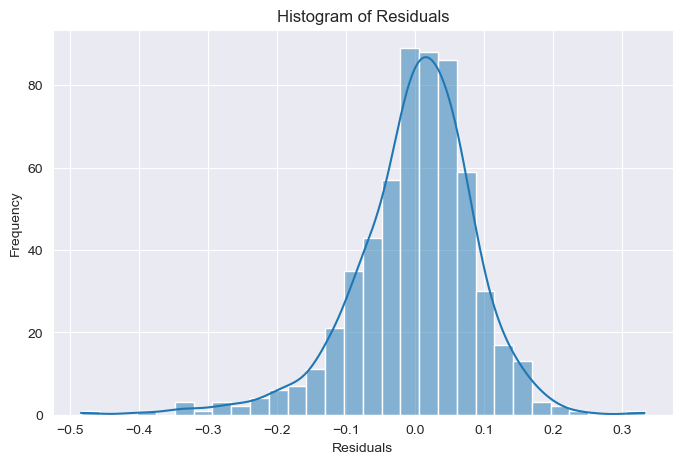

In [1801]:
X_train_lm = sm.add_constant(X_train)
y_train_cnt = lr_manual.predict(X_train_lm)# Predicted values
residuals = y_train - y_train_cnt  # Actual - Predicted

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

> The histogram of residuals displays **roughly bell-shaped and symmetric**, which suggests that the residuals are **approximately normally distributed**. It can go ahead to use this model.

## **Step 7: Making Predictions Using the Final Model**

### **Applying the scaling on the test sets**

In [1802]:
df_test[num_variables] = scaler.transform(df_test[num_variables])
df_test.describe()

,cnt,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow/Rain,weathersit_Mist
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.517368,0.034247,0.746575,0.564965,0.631479,0.317423,0.226027,0.273973,0.219178,0.445205,...,0.089041,0.075342,0.123288,0.178082,0.089041,0.171233,0.219178,0.116438,0.034247,0.315068
std,0.212757,0.182488,0.436469,0.237935,0.156422,0.156946,0.419697,0.447530,0.415114,0.498699,...,0.285783,0.264852,0.329899,0.383899,0.285783,0.378009,0.415114,0.321854,0.182488,0.466142
min,0.055683,0.000000,0.000000,0.030303,0.257732,-0.031250,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.391251,0.000000,0.250000,0.363636,0.528351,0.195312,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.508916,0.000000,1.000000,0.545455,0.608247,0.312500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.649994,0.000000,1.000000,0.787879,0.721649,0.406250,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.963300,1.000000,1.000000,0.969697,1.000000,0.781250,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Dividing into X_test and y_test**

In [1803]:
y_test = df_test.pop('cnt')
X_test = df_test

### **Prepare test set to match with train set**

In [ ]:
# Get the list of columns from the trained model
model_features = list(X_train.columns)

# Ensure X_test contains only those columns
X_test = X_test[model_features]

# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

### **Making predictions using the fourth model**

In [ ]:
y_pred = lr_manual.predict(X_test_m)

## **Step 8: Model Evaluation**

Let's now plot the graph for actual versus predicted values.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE) and R-squared (R²) for the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R² Score: {r2}")

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Actual vs Predicted Bike Rentals")
plt.show()

> R² Score: **0.784 → About 78.4%** of the variance in bike demand is explained by the model.
>
> MSE: **0.0097** → The model has a low error, meaning it predicts bike rentals accurately.
>
> The Actual vs Predicted Plot shows a strong positive correlation, confirming a good fit.